In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, 

# Libraries for data visualization
import matplotlib.pyplot as pplt  
import seaborn as sns 
from pandas.plotting import scatter_matrix

# Import scikit_learn module for the algorithm/model: Linear Regression
from sklearn.linear_model import LogisticRegression
# Import scikit_learn module to split the dataset into train.test sub-datasets
from sklearn.model_selection import train_test_split 
# Import scikit_learn module for k-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# import the metrics class
from sklearn import metrics
# import stats for accuracy 
import statsmodels.api as sm

In [ ]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')
data 

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
data.dtypes

39                 int64
 State-gov        object
 77516             int64
 Bachelors        object
 13                int64
 Never-married    object
 Adm-clerical     object
 Not-in-family    object
 White            object
 Male             object
 2174              int64
 0                 int64
 40                int64
 United-States    object
 <=50K            object
dtype: object

In [ ]:
data.columns = data.columns.str.replace(' ', '')

In [ ]:
data.columns = data.columns.str.replace('.', '_')

In [ ]:
data.head(16)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [ ]:
col_names = list(data.columns)
print('col_names: {} \n length: {}'.format(col_names, len(col_names)))

col_names: ['39', 'State-gov', '77516', 'Bachelors', '13', 'Never-married', 'Adm-clerical', 'Not-in-family', 'White', 'Male', '2174', '0', '40', 'United-States', '<=50K'] 
 length: 15


In [ ]:
len(list(data[0:1:-1]))

15

In [ ]:
data_header = ['Age','Workclass','fnlwgt','Education','Education-num','Marital_Status','Occupation','Relationship','Race','Sex','Capital-gain','Capital-loss','hrs_per_week','Native-Country','Earning_potential']
data = pd.read_csv(('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'), names = data_header)
data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country,Earning_potential
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.sample(50)

,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country,Earning_potential
7771,44,Private,336513,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States,<=50K
15391,22,Private,401762,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,55,United-States,<=50K
13593,28,Private,130856,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
26598,23,?,87569,Some-college,10,Separated,?,Not-in-family,White,Female,0,0,40,United-States,<=50K
27690,36,Private,205359,HS-grad,9,Married-spouse-absent,Other-service,Unmarried,White,Female,0,0,25,United-States,<=50K
3975,24,Private,215251,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,50,United-States,<=50K
4692,55,Self-emp-not-inc,168625,Some-college,10,Divorced,Tech-support,Not-in-family,White,Female,0,0,12,United-States,>50K
3147,26,Private,139992,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
6421,30,Private,177216,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,1740,40,Haiti,<=50K
26650,34,Private,287737,Some-college,10,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1485,40,United-States,>50K


In [ ]:
for i in data.columns:
    t = data[i].value_counts()
    index = list(t.index)
    print ("jumlah ? di kolom berjumlah", i)
    for i in index:
        x = 0
        if i == '?':
            print (t['?'])
            x = 1
            break
    if x == 0:
        print ("0")

jumlah ? di kolom berjumlah Age
0
jumlah ? di kolom berjumlah Workclass
0
jumlah ? di kolom berjumlah fnlwgt
0
jumlah ? di kolom berjumlah Education
0
jumlah ? di kolom berjumlah Education-num
0
jumlah ? di kolom berjumlah Marital_Status
0
jumlah ? di kolom berjumlah Occupation
0
jumlah ? di kolom berjumlah Relationship
0
jumlah ? di kolom berjumlah Race
0
jumlah ? di kolom berjumlah Sex
0
jumlah ? di kolom berjumlah Capital-gain
0
jumlah ? di kolom berjumlah Capital-loss
0
jumlah ? di kolom berjumlah hrs_per_week
0
jumlah ? di kolom berjumlah Native-Country
0
jumlah ? di kolom berjumlah Earning_potential
0


In [ ]:
data = data.replace(to_replace = '%?%', value = np.nan) #Mengganti '?' dengan Nan
data.isna().sum()

Age                  0
Workclass            0
fnlwgt               0
Education            0
Education-num        0
Marital_Status       0
Occupation           0
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
hrs_per_week         0
Native-Country       0
Earning_potential    0
dtype: int64

In [ ]:
data.isin(['?']).sum(axis=0)

Age                  0
Workclass            0
fnlwgt               0
Education            0
Education-num        0
Marital_Status       0
Occupation           0
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
hrs_per_week         0
Native-Country       0
Earning_potential    0
dtype: int64

In [ ]:
for c in data.columns:
    print ("---- %s ---" % c)
    print (data[c].value_counts())

---- Age ---
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: Age, Length: 73, dtype: int64
---- Workclass ---
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
---- fnlwgt ---
164190    13
203488    13
123011    13
113364    12
121124    12
          ..
284211     1
312881     1
177711     1
179758     1
229376     1
Name: fnlwgt, Length: 21648, dtype: int64
---- Education ---
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4t

In [ ]:
all_columns = list(data.columns)
print('all_columns:\n {}'.format(all_columns))

categorical_columns = list(data.select_dtypes(include=['object']).columns)
print('Categorical columns:\n {}'.format(categorical_columns))

numerical_columns = list(data.select_dtypes(include=['int64']).columns)
print('Numerical columns:\n {}'.format(numerical_columns))

all_columns:
 ['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'hrs_per_week', 'Native-Country', 'Earning_potential']
Categorical columns:
 []
Numerical columns:
 ['Age', 'fnlwgt', 'Education-num', 'Capital-gain', 'Capital-loss', 'hrs_per_week']


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [ ]:
df_x = data.drop('Earning_potential', axis = 1)
#Y axis = Our dependent variable or the income of adult i.e Income
df_y = data.Earning_potential

In [ ]:
reg = LogisticRegression()
#Split the data into 77% training and 33% testing data
#NOTE: We have to split the dependent variables (x) and the target or independent variable (y)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)

In [ ]:
logistic_regressor = LogisticRegression()

logistic_regressor.fit(x_train, y_train)

LogisticRegression()

In [ ]:
logistic_train_score = logistic_regressor.score(x_train, y_train)
logistic_test_score = logistic_regressor.score(x_test, y_test)
logistic_prediction = logistic_regressor.predict(x_test)

print('Train Score: {0}\nTest Score: {1}'.format(logistic_train_score, logistic_test_score))

Train Score: 0.7982580793032317
Test Score: 0.8035548110924995


In [ ]:
logistic_mse = mean_squared_error(y_test, logistic_prediction)
logistic_rmse = np.sqrt(logistic_mse)
print(logistic_mse, logistic_rmse)

0.19644518890750046 0.44322137686206026


In [ ]:
error_rate = []
# Will take some time
k_values = list(filter(lambda x: x%2==1, range(0,50)))
best_k = 0
for i in k_values:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
print(error_rate.index(np.min(error_rate)))

12


Text(0, 0.5, 'Error Rate')

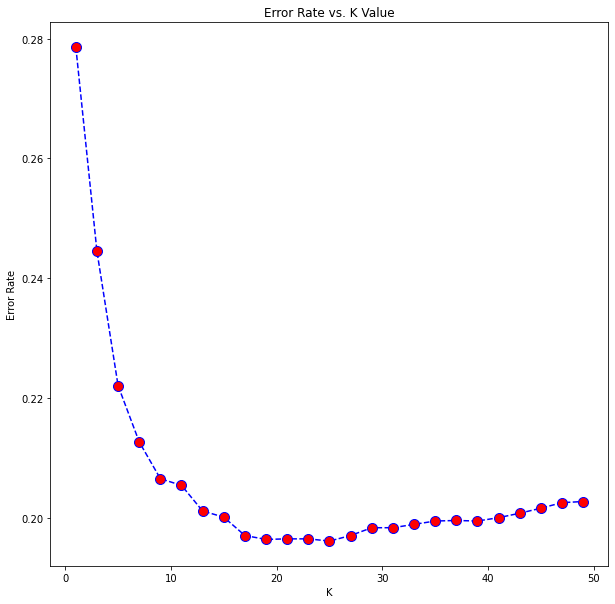

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(k_values,error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=25)
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
knn_train_score = knn_classifier.score(x_train, y_train)
knn_test_score = knn_classifier.score(x_test, y_test)

print('Train score: {}\nTest score: {}'.format(knn_train_score, knn_test_score))

Train score: 0.800045840018336
Test score: 0.80392704262051


In [ ]:
knn_prediction = knn_classifier.predict(x_test)

knn_classifier_mse = mean_squared_error(y_test, knn_prediction)
knn_classifier_rmse = np.sqrt(knn_classifier_mse)

print('MSE: {}\nRMSE: {}'.format(knn_classifier_mse, knn_classifier_rmse))

MSE: 0.19607295737949004
RMSE: 0.4428012617184938


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                32561 non-null  int64
 1   Workclass          32561 non-null  int32
 2   fnlwgt             32561 non-null  int64
 3   Education          32561 non-null  int32
 4   Education-num      32561 non-null  int64
 5   Marital_Status     32561 non-null  int32
 6   Occupation         32561 non-null  int32
 7   Relationship       32561 non-null  int32
 8   Race               32561 non-null  int32
 9   Sex                32561 non-null  int32
 10  Capital-gain       32561 non-null  int64
 11  Capital-loss       32561 non-null  int64
 12  hrs_per_week       32561 non-null  int64
 13  Native-Country     32561 non-null  int32
 14  Earning_potential  32561 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
Workclass,32561.0,3.868892,1.455960,0.0,4.0,4.0,4.0,8.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
Education,32561.0,10.298210,3.870264,0.0,9.0,11.0,12.0,15.0
Education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
Marital_Status,32561.0,2.611836,1.506222,0.0,2.0,2.0,4.0,6.0
Occupation,32561.0,6.572740,4.228857,0.0,3.0,7.0,10.0,14.0
Relationship,32561.0,1.446362,1.606771,0.0,0.0,1.0,3.0,5.0
Race,32561.0,3.665858,0.848806,0.0,4.0,4.0,4.0,4.0
Sex,32561.0,0.669205,0.470506,0.0,0.0,1.0,1.0,1.0


In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(data[categorical_columns[3]])
plt.show()

IndexError: list index out of range

<Figure size 1080x720 with 0 Axes>

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(data[categorical_columns[8]])
plt.show()

IndexError: list index out of range

<Figure size 1080x720 with 0 Axes>

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(data[categorical_columns[2]])
plt.show()

IndexError: list index out of range

<Figure size 1080x720 with 0 Axes>

In [ ]:
data.groupby(['Occupation', 'Earning_potential']).size()

Occupation  Earning_potential
0           0                    1652
            1                     191
1           0                    3263
            1                     507
2           0                       8
            1                       1
3           0                    3170
            1                     929
4           0                    2098
            1                    1968
5           0                     879
            1                     115
6           0                    1284
            1                      86
7           0                    1752
            1                     250
8           0                    3158
            1                     137
9           0                     148
            1                       1
10          0                    2281
            1                    1859
11          0                     438
            1                     211
12          0                    2667
            1       

In [ ]:
data.groupby(['Marital_Status', 'hrs_per_week']).size()

Marital_Status  hrs_per_week
0               1               3
                3               1
                4               3
                5               7
                6               4
                               ..
6               70              2
                72              1
                75              2
                80              3
                99              3
Length: 420, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
encoded_data = data
for i in categorical_columns:
    encoded_data[i] = label_encoder.fit_transform(data[i])
encoded_data[categorical_columns].head()

""
0
1
2
3
4


In [ ]:
def outlier_detector(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn,[25,75])
    IQR = Q3 - Q1
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
    return lower_bound,upper_bound

In [ ]:
lowerbound, upperbound = outlier_detector(encoded_data['Age'])
lowerbound, upperbound

(-2.0, 78.0)

In [ ]:
encoded_data[(encoded_data.Age < lowerbound) | (encoded_data.Age > upperbound)]

,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country,Earning_potential
74,79,4,124744,15,10,2,10,2,4,1,0,0,20,39,0
222,90,4,51744,11,9,4,8,1,2,1,0,2206,40,39,0
430,80,0,107762,11,9,6,0,1,4,1,0,0,24,39,0
918,81,6,136063,11,9,2,4,0,4,1,0,0,30,39,0
1040,90,4,137018,11,9,4,8,1,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32277,90,4,313749,11,9,6,1,4,4,0,0,0,25,39,0
32367,90,2,214594,5,4,2,11,0,4,1,2653,0,40,39,0
32459,85,4,98611,9,13,2,4,0,4,1,0,0,3,31,0
32494,82,0,403910,11,9,4,0,1,4,1,0,0,3,39,0


In [ ]:
new_columns = numerical_columns.copy()
new_columns.remove('Capital-gain') 
new_columns.remove('Capital-loss') 
new_columns

['Age', 'fnlwgt', 'Education-num', 'hrs_per_week']

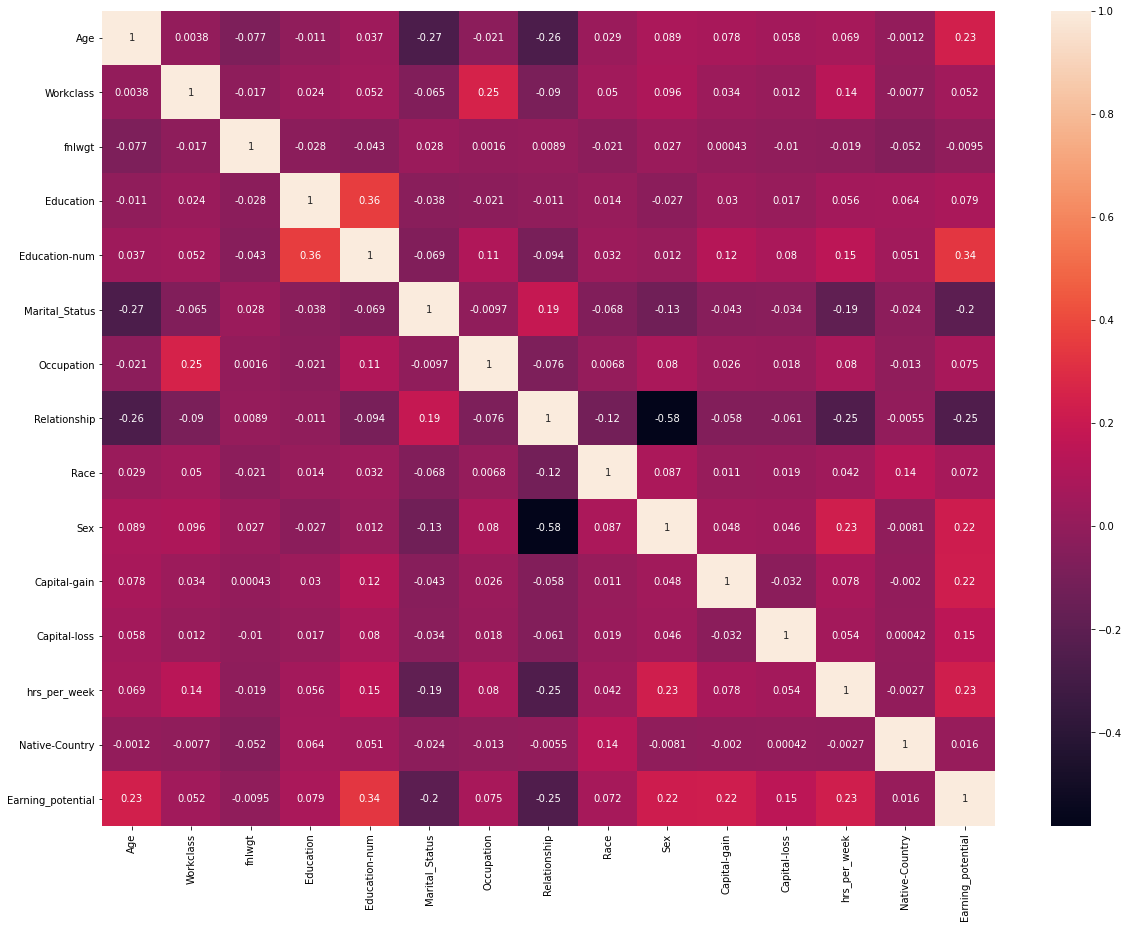

In [ ]:
fig,ax=plt.subplots(figsize=(20,15))
ax=sns.heatmap(treated_encoded_data.corr(),annot=True)

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
X = data.iloc[:, :-1].values   
Y = data.iloc[:, 3].values  

In [ ]:
imputer = SimpleImputer (missing_values = np.nan, strategy = 'mean') 
imputer = imputer.fit (X [:, 1: ])
X [:, 1:] = imputer.transform (X [:, 1:])

In [ ]:
X

array([[    39,      7,  77516, ...,      0,     40,     39],
       [    50,      6,  83311, ...,      0,     13,     39],
       [    38,      4, 215646, ...,      0,     40,     39],
       ...,
       [    58,      4, 151910, ...,      0,     40,     39],
       [    22,      4, 201490, ...,      0,     20,     39],
       [    52,      5, 287927, ...,      0,     40,     39]], dtype=int64)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y,
test_size=0.25, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 240,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   0,  286,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   0,    0,  116,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   0,    0,    0,   31,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   0,    0,    0,    0,   86,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,  176,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,  139,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,  254,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  343,    0,    0,
           0,    0,   

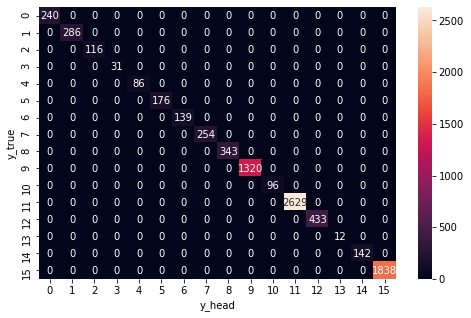

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f",
ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       240
           1       1.00      1.00      1.00       286
           2       1.00      1.00      1.00       116
           3       1.00      1.00      1.00        31
           4       1.00      1.00      1.00        86
           5       1.00      1.00      1.00       176
           6       1.00      1.00      1.00       139
           7       1.00      1.00      1.00       254
           8       1.00      1.00      1.00       343
           9       1.00      1.00      1.00      1320
          10       1.00      1.00      1.00        96
          11       1.00      1.00      1.00      2629
          12       1.00      1.00      1.00       433
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00       142
          15       1.00      1.00      1.00      1838

    accuracy                           1.00      8141
   macro avg       1.00   